E=0.0017


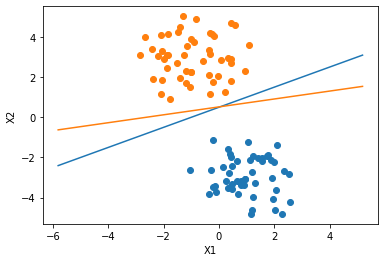

In [177]:
#(a) When eta is 100
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
#draw f
def draw_f(x_min, x_max):
    x = np.arange(x_min, x_max)
    y = 0.5*x + 0.5
    plt.plot(x,y)

def draw_g(x_min, x_max, w):
    x = np.arange(x_min,x_max)
    y = (-w[1]*x-w[0])/w[2]
    plt.plot(x,y)

#draw points
def generate_X(N):
    mean1 = [1,-3]
    cov1 = [[1,0],[0,1]]
    mean2 = (-1,3)
    cov2 = [[1,0],[0,1]]
    X1 = np.random.multivariate_normal(mean1,cov1,N//2)
    X2 = np.random.multivariate_normal(mean2,cov1,N//2)
    return X1, X2

def draw_points(X1, X2):
    plt.scatter(X1[:,0],X1[:,1],marker='o')
    plt.scatter(X2[:,0],X2[:,1],marker='o')
    plt.xlabel("X1")
    plt.ylabel("X2")
    # plt.show()

def perceptron_optimal(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((np.ones(m), X))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while iter <= 1000:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:])) <= 1:
            diff = y[i] - w.dot(X[i,:])
            w = w + learning_rate * diff * X[i,:]
            
            continue
        
        predict=sign(X,w)
        if np.all(predict==y):
            break
    iter += 1
    return w,w_record

#指示函数
def sign(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
def calc_E(X,y,w, N):
    E = 0
    for i in range(N):
        f = w.dot(X[i,:])
        if f * y[i] < 0:
            E += 1
    E = E / N
    return E

N = 100
X1,X2 = generate_X(N)
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1

#Test set
test_N = 10000
test_X1,test_X2 = generate_X(test_N)
test_X = np.row_stack((test_X1,test_X2))
test_X=np.column_stack((np.ones(test_N), test_X))
test_y = np.ones(test_N)
test_y[0:test_N//2] = -1


learning_rate = 100
draw_f(X.min()-1, X.max()+1)
draw_points(X1, X2)
w,w_record = perceptron_optimal(X,y,learning_rate)
draw_g(X.min()-1, X.max()+1, w)
E = calc_E(test_X,test_y,w,test_N)
print(f"E={E}")

E=0.0016


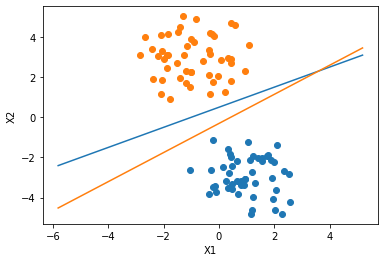

In [178]:
#(b) When eta is 1

learning_rate = 1
draw_f(X.min()-1, X.max()+1)
draw_points(X1, X2)
w,w_record = perceptron_optimal(X,y,learning_rate)
draw_g(X.min()-1, X.max()+1, w)
E = calc_E(test_X,test_y,w,test_N)
print(f"E={E}")

E=0.0143


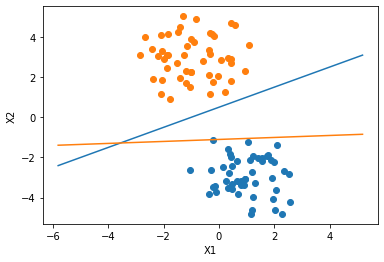

In [179]:
#(c) When eta is 0.01

learning_rate = 0.01
draw_f(X.min()-1, X.max()+1)
draw_points(X1, X2)
w,w_record = perceptron_optimal(X,y,learning_rate)
draw_g(X.min()-1, X.max()+1, w)
E = calc_E(test_X,test_y,w,test_N)
print(f"E={E}")

E=0.0146


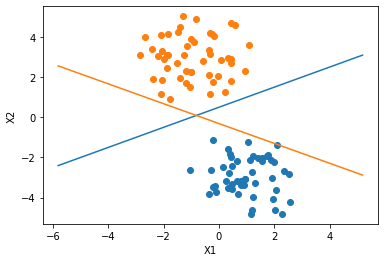

In [180]:
#(d) When eta is 0.0001

learning_rate = 0.0001
draw_f(X.min()-1, X.max()+1)
draw_points(X1, X2)
w,w_record = perceptron_optimal(X,y,learning_rate)
draw_g(X.min()-1, X.max()+1, w)
E = calc_E(test_X,test_y,w,test_N)
print(f"E={E}")

In [181]:
#(e)
# E from (a),(b) is 0.0017, 0.0016, which shows the result become better
# E from (d),(e) is 0.0143, 0.0146, which shows the result become worse

#Conclusion: When eta becomes less, the error rate becomes less. Then when eta is less than some threshold, the error rate becoms greater.